In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Bidirectional, Add, LSTM, Flatten, Dropout
from tensorflow import keras
import tensorflow as tf



2023-05-12 21:40:23.055762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('4105819v2474763.csv', index_col=0)
df

,ltp odds,r1 spread,r1 pup,r2 spread,r2 pup,enhanced_markov,markov_odds,r1_0,r1_1,r1_2,r1_3,r2_0,r2_1,r2_2,r2_3
2018-07-11 16:36:40,0.582332,0.008959,0.255166,0.018627,0.242267,0.507162,0.582891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-11 16:36:45,0.582423,0.008959,0.255166,0.018627,0.242267,0.507162,0.582891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-11 16:36:50,0.582515,0.008959,0.255166,0.018627,0.242267,0.507162,0.582891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-11 16:36:55,0.582606,0.008959,0.255166,0.018627,0.242267,0.507162,0.582891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2018-07-11 16:37:00,0.582697,0.008959,0.255166,0.018627,0.242267,0.507162,0.582891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-11 19:32:52,0.000000,1.624489,0.267253,0.037379,0.658020,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-07-11 19:32:55,0.000000,1.624489,0.267253,0.037379,0.658020,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-07-11 19:32:57,0.000000,1.624489,0.267253,0.037379,0.658020,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-07-11 19:33:00,0.000000,1.624489,0.267253,0.037379,0.658020,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [3]:
data = df.to_numpy()
data

array([[0.5823319 , 0.00895867, 0.25516555, ..., 0.        , 0.        ,
        1.        ],
       [0.58242327, 0.00895867, 0.25516555, ..., 0.        , 0.        ,
        1.        ],
       [0.58251465, 0.00895867, 0.25516555, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.62448857, 0.26725326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.62448857, 0.26725326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.62448857, 0.26725326, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
train_temp, test = train_test_split(data, test_size=0.8, shuffle=False)
train, val = train_test_split(train_temp, test_size=0.2, shuffle=False)
# train_x, train_y = seq2seq_model.truncate_data(data, 60 * 3, 60)
# train = data[: 60 * 8, :]
# test = data[60 * 8 :, :]
print(test.shape, train.shape)
# print(train_x[2,:,0])
# print(train_y[2,:,0])

(1752, 15) (350, 15)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 75, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 75, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 16)                3216      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 485,633
Trainable params: 485,633
Non-trainab

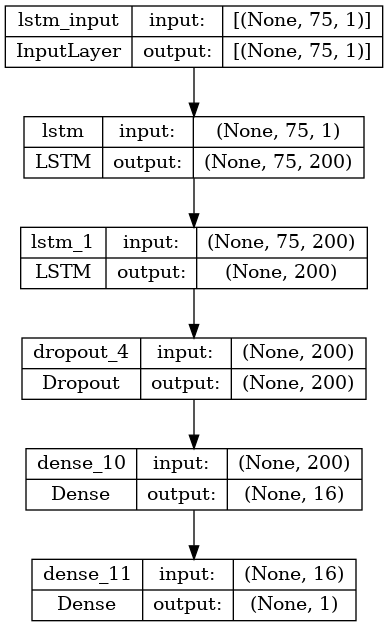

In [5]:
model = load_model("transfer_lstm_model")
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

In [6]:
# score, scores, actual, predicted = seq2seq_model.evaluate_model(model, train, test, 3, 36, features_out=range(1), features=range(1), features_in_num=1, features_out_num=1, initial_epochs=100, epochs=2, batches_to_train=100000)
window = 75
val_x, val_y = seq2seq_model.truncate_single_step(train, window, features_in=range(1), features_out=range(1))
results = model.evaluate(val_x, val_y)
preds = model.predict(val_x)

9/9 [==============================] - 0s 3ms/step


RMSE:  0.038095269832674805
MAE:  0.037733983248472214


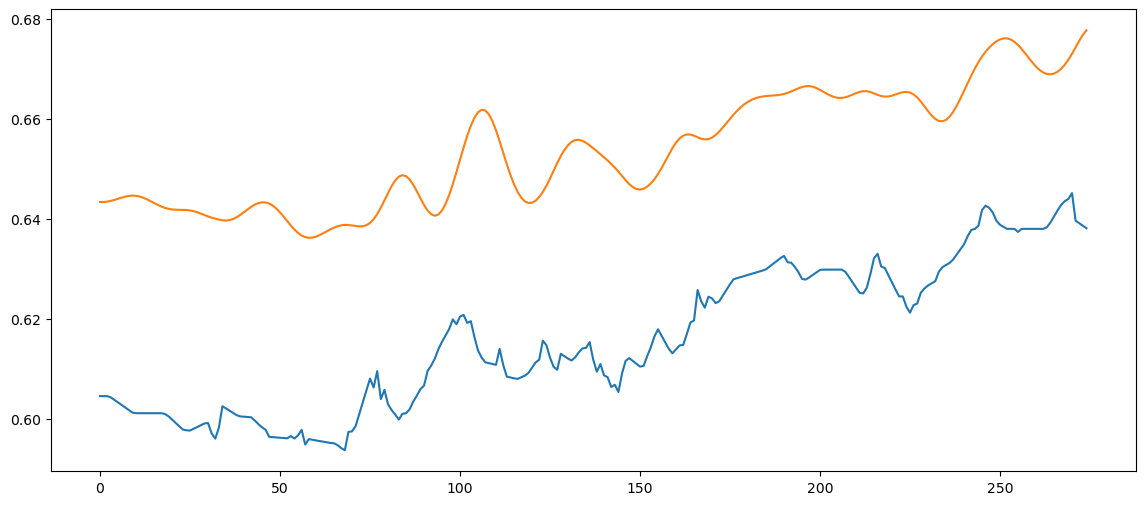

In [7]:
plt.figure(figsize=(14,6))
plt.plot(val_y[:,0])
plt.plot(preds[:,0])
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [8]:
train_x, train_y = seq2seq_model.truncate_single_step(train_temp, n_steps=window, features_in=range(1), features_out=range(1))
val_x, val_y = seq2seq_model.truncate_single_step(val, window, features_in=range(1), features_out=range(1))
features_out_num = train_y.shape[1]
print(val_x.shape, val_y.shape)
print(val.shape)
print(train_x.shape, train_y.shape)
x = model.get_layer('lstm_1').output
# x = Dropout(0.2)(x)
x = Dense(16, activation='elu')(x)
x = Dense(features_out_num, activation='sigmoid')(x)
model = keras.models.Model(inputs=model.input, outputs=x)

# x = model.get_layer('bidirectional').output
# y = model.get_layer('bidirectional_1').output
# bd_out_1 = Bidirectional(LSTM(features_out_num, activation='linear'), merge_mode='sum')(x)
# bd_out_2 = Bidirectional(LSTM(features_out_num, activation='tanh'), merge_mode='sum')(y)
# model_out = Add()([bd_out_1, bd_out_2])
# model = keras.models.Model(inputs=model.input, outputs=model_out)

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])
# print(model.get_layer('lstm').get_weights())
history = model.fit(train_x, train_y, epochs=25, batch_size=25, verbose=1)

(13, 75, 1) (13, 1)
(88, 15)
(363, 75, 1) (363, 1)
Epoch 1/25
15/15 [==============================] - 3s 10ms/step - loss: 5.3016e-04 - mae: 0.0183
Epoch 2/25
15/15 [==============================] - 0s 10ms/step - loss: 1.5029e-04 - mae: 0.0099
Epoch 3/25
15/15 [==============================] - 0s 10ms/step - loss: 1.4301e-04 - mae: 0.0098
Epoch 4/25
15/15 [==============================] - 0s 10ms/step - loss: 1.1046e-04 - mae: 0.0092
Epoch 5/25
15/15 [==============================] - 0s 10ms/step - loss: 9.9776e-05 - mae: 0.0086
Epoch 6/25
15/15 [==============================] - 0s 10ms/step - loss: 8.9565e-05 - mae: 0.0081
Epoch 7/25
15/15 [==============================] - 0s 10ms/step - loss: 7.6997e-05 - mae: 0.0073
Epoch 8/25
15/15 [==============================] - 0s 10ms/step - loss: 5.6636e-05 - mae: 0.0063
Epoch 9/25
15/15 [==============================] - 0s 10ms/step - loss: 4.4515e-05 - mae: 0.0055
Epoch 10/25
15/15 [==============================] - 0s 10ms/step -

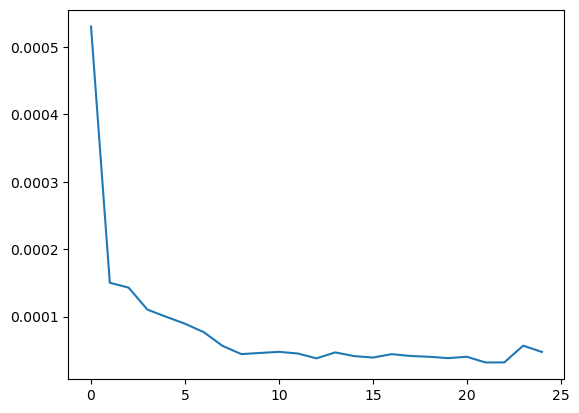

In [9]:
plt.plot(history.history['loss'])

In [10]:
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(1), features_out=range(1))
results = model.evaluate(test_x, test_y)
preds = model.predict(test_x)

53/53 [==============================] - 0s 3ms/step


(1677, 1)
RMSE:  0.17652559042299584
MAE:  0.11971288174390793


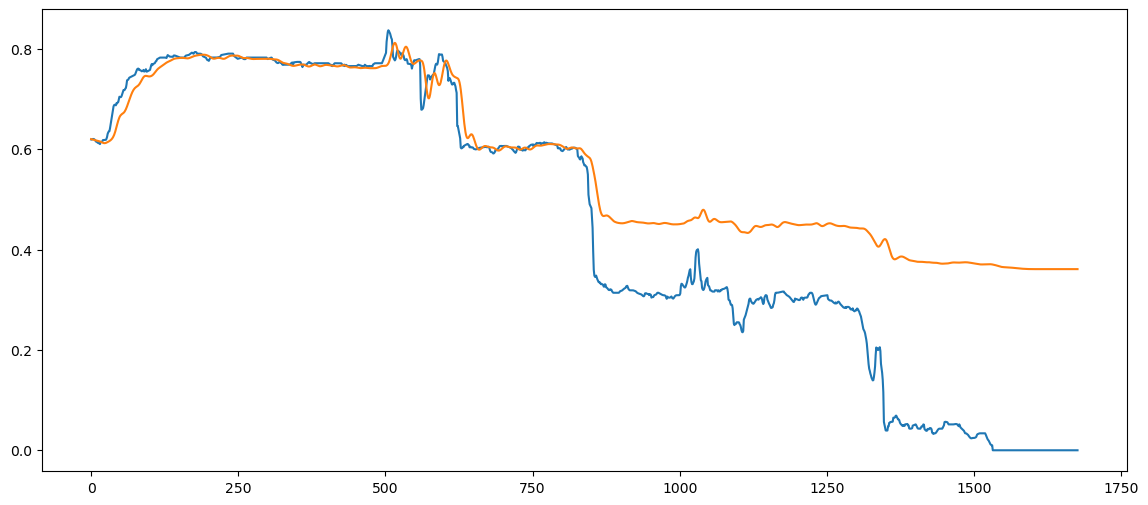

In [11]:
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
plt.plot(preds[:,0])
print(preds.shape)
print('RMSE: ', np.sqrt(results[0]))
print('MAE: ', results[1])

In [12]:
train, test = train_test_split(data, test_size=0.7, shuffle=False)
test_x, test_y = seq2seq_model.truncate_single_step(test, window, features_in=range(1), features_out=range(1))
forecasts = []
i = 0
forecast_window = 36
while i * forecast_window < test_x.shape[0]:
    pred_x_temp = test_x[forecast_window * i, :, :]
    pred_y_temp = test_y[forecast_window * i, :]
    pred_x = pred_x_temp.reshape((1, window, pred_x_temp.shape[1]))
    y_future = []
    for k in range(forecast_window):
        pred_y = model.predict(pred_x)
        y_future.append(pred_y)
        pred_x = np.append(pred_x[:, 1:, :], pred_y.reshape(1, 1, 1), axis=1)
    forecasts.append(y_future)
    pred_x_temp = pred_x_temp.reshape((1, window, test_x.shape[2]))
    pred_y_temp = pred_y_temp.reshape((1, 1))
    train_x = np.vstack((train_x, pred_x_temp))
    train_y = np.vstack((train_y, pred_y_temp))
    i += 1
    if i % 5 == 0:
        model.reset_states()
        model.fit(train_x, train_y, epochs=3, batch_size=25, verbose=1)

1/1 [==============================] - 0s 11ms/step
Epoch 1/3
15/15 [==============================] - 0s 10ms/step - loss: 5.3778e-05 - mae: 0.0060
Epoch 2/3
15/15 [==============================] - 0s 10ms/step - loss: 5.2314e-05 - mae: 0.0058
Epoch 3/3
1/1 [==============================] - 0s 15ms/step
Epoch 1/3
15/15 [==============================] - 0s 10ms/step - loss: 3.9404e-05 - mae: 0.0047
Epoch 2/3
15/15 [==============================] - 0s 10ms/step - loss: 4.0975e-05 - mae: 0.0048
Epoch 3/3
1/1 [==============================] - 0s 10ms/step
Epoch 1/3
16/16 [==============================] - 0s 10ms/step - loss: 4.0243e-05 - mae: 0.0049
Epoch 2/3
16/16 [==============================] - 0s 10ms/step - loss: 4.4939e-05 - mae: 0.0049
Epoch 3/3
1/1 [==============================] - 0s 11ms/step
Epoch 1/3
16/16 [==============================] - 0s 10ms/step - loss: 9.2044e-05 - mae: 0.0055
Epoch 2/3
16/16 [==============================] - 0s 10ms/step - loss: 6.2583e-05 

RMSE:  0.03116128407418728
MAE:  0.11971288174390793
(41, 36, 1, 1)
(1476,)


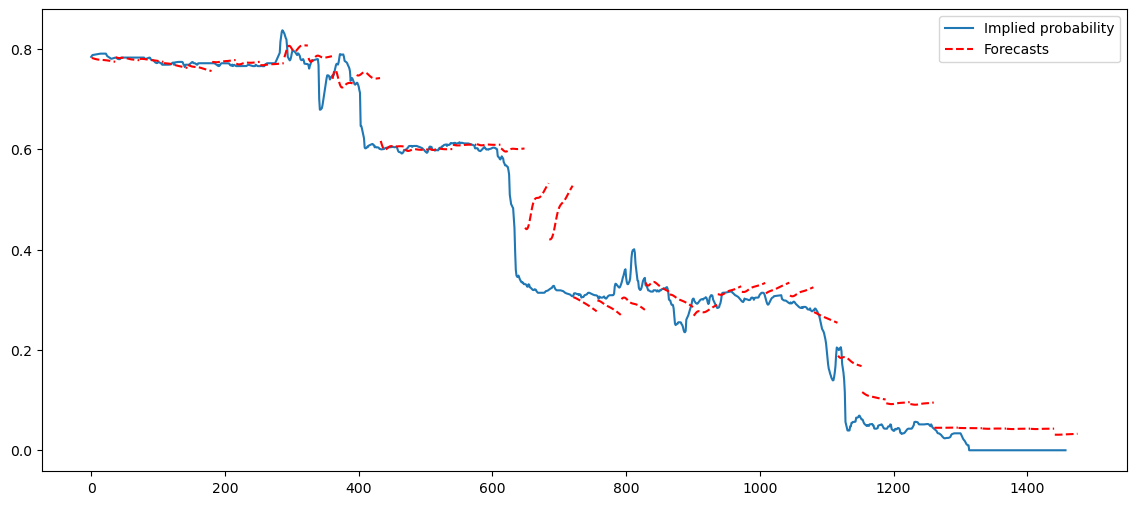

In [17]:
print('RMSE: ', results[0])
print('MAE: ', results[1])
forecasts_arr = np.array(forecasts)
forecasts_flat = forecasts_arr[:, :, 0, 0].flatten()
print(forecasts_arr.shape)
print(forecasts_flat.shape)
df_preds = pd.DataFrame({'Predictions': forecasts_flat}).shift(1)
plt.figure(figsize=(14,6))
plt.plot(test_y[:,0])
i = 0
idx = 0

while idx + forecast_window <= test_x.shape[0]:
     idx = forecast_window * i + 1
     s_pred = df_preds.iloc[idx:idx + forecast_window]
     plt.plot(s_pred, '--', color='red')
     i += 1

plt.legend(['Implied probability', 'Forecasts'])
plt.savefig('Figures/cv_forecast.png')

0            NaN
36      0.774222
72      0.777209
108     0.773989
144     0.761913
180     0.755736
216     0.777774
252     0.774148
288     0.771290
324     0.806784
360     0.785436
396     0.728616
432     0.741616
468     0.605443
504     0.599425
540     0.600248
576     0.608879
612     0.609015
648     0.601407
684     0.532186
720     0.527219
756     0.276848
792     0.269767
828     0.279840
864     0.316391
900     0.285430
936     0.289623
972     0.326877
1008    0.333500
1044    0.334055
1080    0.324873
1116    0.254103
1152    0.167730
1188    0.101359
1224    0.096074
1260    0.095196
1296    0.045159
1332    0.044021
1368    0.043331
1404    0.043134
1440    0.043134
Name: Predictions, dtype: float32
Mean absolute error of last forecast observation:  0.048516893722042646
Mean squared error of last forecast observation:  0.005962816664120971
Root mean squared error of last forecast observation:  0.0772192765060705


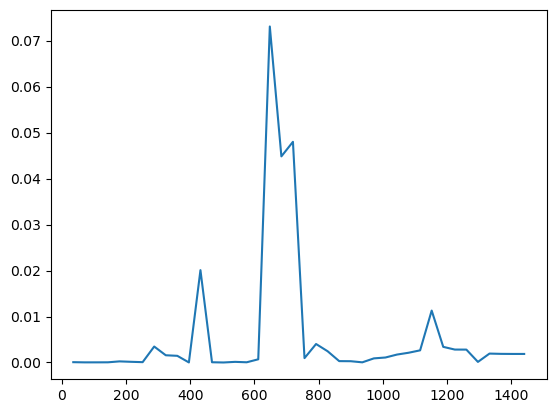

In [18]:
pred_length = test_y.shape[0]
print(df_preds['Predictions'].iloc[:pred_length:36])
df_scores = pd.DataFrame({'Forecasts': df_preds['Predictions'].iloc[:pred_length:36], 'Actual': test_y[1::36,0]})
df_scores['absolute error'] = abs(df_scores['Actual'] - df_scores['Forecasts'])
df_scores['squared error'] = df_scores['absolute error']**(2)
print('Mean absolute error of last forecast observation: ', df_scores['absolute error'].mean())
print('Mean squared error of last forecast observation: ', df_scores['squared error'].mean())
print('Root mean squared error of last forecast observation: ', np.sqrt(df_scores['squared error'].mean()))
plt.plot(df_scores['squared error'])

In [15]:
# print('RMSE: ', score)
# actual_odds = actual.reshape((actual.shape[0]*actual.shape[1]))
# predicted_odds = predicted.reshape((predicted.shape[0]*predicted.shape[1]))
# df_pred = pd.DataFrame({'pred':predicted_odds})
# plt.figure(figsize=(14,6))
# plt.plot(actual_odds)
# for i in range(predicted.shape[0]):
#     idx = 60 * i
#     s_pred = df_pred.iloc[idx:idx + 60]
#     plt.plot(s_pred, '--', color='red')

In [16]:
# plt.figure(figsize=(14,6))
# plt.plot(scores, '-o')